In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import datetime
import os
import re
from collections import Counter
from datetime import datetime

import numpy as np
from keras.preprocessing import sequence

In [40]:
def load_dataset(filename):
    # dateset fields
    timestamps = []
    sensors = []
    values = []
    activities = []

    current_activity = ''  # empty

    with open(filename, 'rb') as features:
        database = features.readlines()
        for i, line in enumerate(database):  # each line
            f_info = line.decode().split()  # find fields
            try:
                if 'M' == f_info[2][0] or 'D' == f_info[2][0] or 'T' == f_info[2][0]:
                    # choose only M D T sensors, avoiding unexpected errors
                    if not ('.' in str(np.array(f_info[0])) + str(np.array(f_info[1]))):
                        f_info[1] = f_info[1] + '.000000'
                    timestamps.append(datetime.strptime(str(np.array(f_info[0])) + str(np.array(f_info[1])),
                                                        "%Y-%m-%d%H:%M:%S.%f"))
                    sensors.append(str(np.array(f_info[2])))
                    if 'OFF' in f_info[3]:
                        values.append('OFF')
                    elif 'ON' in f_info[3]:
                        values.append('ON')
                    elif:
                        values.append(str(np.array(f_info[3])))

                    if len(f_info) == 4:  # if activity does not exist
                        activities.append(current_activity)
                    else:  # if activity exists
                        des = str(' '.join(np.array(f_info[4:])))
                        if 'begin' in des:
                            current_activity = re.sub('begin', '', des)
                            if current_activity[-1] == ' ':  # if white space at the end
                                current_activity = current_activity[:-1]  # delete white space
                            activities.append(current_activity)
                        if 'end' in des:
                            activities.append(current_activity)
                            current_activity = ''
            except IndexError:
                print(i, line)
    features.close()
    # dictionaries: assigning keys to values
    temperature = []
    for element in values:
        try:
            temperature.append(float(element))
        except ValueError:
            temperature.append()
    
    return timestamps, sensors, values, activities, temperature

SyntaxError: invalid syntax (669767674.py, line 26)

In [53]:
def AssignKeysToValues(timestamps, sensors, values, activities, temperature):
    sensorsList = sorted(set(sensors))
    dictSensors = {}
    for i, sensor in enumerate(sensorsList):
        dictSensors[sensor] = i
    activityList = sorted(set(activities))
    dictActivities = {}
    for i, activity in enumerate(activityList):
        dictActivities[activity] = i
    valueList = sorted(set(values))
    dictValues = {}
    for i, v in enumerate(valueList):
        dictValues[v] = i
    dictObs = {}
    count = 0
    for key in dictSensors.keys():
        if "M" or "AD" in key:
            dictObs[key + "OFF"] = count
            count += 1
            dictObs[key + "ON"] = count
            count += 1
        if "D" in key:
            dictObs[key + "CLOSE"] = count
            count += 1
            dictObs[key + "OPEN"] = count
            count += 1
        if "T" in key:
            for temp in range(0, int((max(temperature) - min(temperature)) * 2) + 1):
                dictObs[key + str(float(temp / 2.0) + min(temperature))] = count + temp

    XX = []
    YY = []
    X = []
    Y = []
    for kk, s in enumerate(sensors):
        if "T" in s:
            try:
                XX.append(dictObs[s + str(round(float(values[kk]), 1))])
            except Exception:
                if len(XX) > 0:
                    XX.append(XX[-1])
                else:
                    XX.append(0)
                
        else:
            try:
                XX.append(dictObs[s + str(values[kk])])
            except Exception:
                if len(XX) > 0:
                    XX.append(XX[-1])
                else:
                    XX.append(0)
        YY.append(dictActivities[activities[kk]])

    x = []
    for i, y in enumerate(YY):
        if i == 0:
            Y.append(y)
            x = [XX[i]]
        if i > 0:
            if y == YY[i - 1]:
                x.append(XX[i])
            else:
                Y.append(y)
                X.append(x)
                x = [XX[i]]
        if i == len(YY) - 1:
            if y != YY[i - 1]:
                Y.append(y)
            X.append(x)
    return X, Y, dictActivities

In [45]:
aruba_dataset = load_dataset("./dataset/data")

In [37]:
aruba_dataset

([datetime.datetime(2010, 11, 4, 0, 3, 50, 209589),
  datetime.datetime(2010, 11, 4, 0, 3, 57, 399391),
  datetime.datetime(2010, 11, 4, 0, 15, 8, 984841),
  datetime.datetime(2010, 11, 4, 0, 30, 19, 185547),
  datetime.datetime(2010, 11, 4, 0, 30, 19, 385336),
  datetime.datetime(2010, 11, 4, 0, 35, 22, 245870),
  datetime.datetime(2010, 11, 4, 0, 40, 25, 428962),
  datetime.datetime(2010, 11, 4, 0, 45, 28, 658171),
  datetime.datetime(2010, 11, 4, 1, 5, 42, 269469),
  datetime.datetime(2010, 11, 4, 1, 15, 48, 936777),
  datetime.datetime(2010, 11, 4, 1, 30, 59, 100184),
  datetime.datetime(2010, 11, 4, 1, 46, 9, 301846),
  datetime.datetime(2010, 11, 4, 1, 56, 16, 59687),
  datetime.datetime(2010, 11, 4, 2, 21, 32, 138203),
  datetime.datetime(2010, 11, 4, 2, 21, 32, 228625),
  datetime.datetime(2010, 11, 4, 2, 32, 33, 351906),
  datetime.datetime(2010, 11, 4, 2, 32, 38, 895958),
  datetime.datetime(2010, 11, 4, 2, 41, 45, 231875),
  datetime.datetime(2010, 11, 4, 2, 56, 55, 529628),

In [12]:
aruba_dataset[0]

[datetime.datetime(2010, 11, 4, 0, 3, 50, 209589),
 datetime.datetime(2010, 11, 4, 0, 3, 57, 399391),
 datetime.datetime(2010, 11, 4, 0, 15, 8, 984841),
 datetime.datetime(2010, 11, 4, 0, 30, 19, 185547),
 datetime.datetime(2010, 11, 4, 0, 30, 19, 385336),
 datetime.datetime(2010, 11, 4, 0, 35, 22, 245870),
 datetime.datetime(2010, 11, 4, 0, 40, 25, 428962),
 datetime.datetime(2010, 11, 4, 0, 45, 28, 658171),
 datetime.datetime(2010, 11, 4, 1, 5, 42, 269469),
 datetime.datetime(2010, 11, 4, 1, 15, 48, 936777),
 datetime.datetime(2010, 11, 4, 1, 30, 59, 100184),
 datetime.datetime(2010, 11, 4, 1, 46, 9, 301846),
 datetime.datetime(2010, 11, 4, 1, 56, 16, 59687),
 datetime.datetime(2010, 11, 4, 2, 21, 32, 138203),
 datetime.datetime(2010, 11, 4, 2, 21, 32, 228625),
 datetime.datetime(2010, 11, 4, 2, 32, 33, 351906),
 datetime.datetime(2010, 11, 4, 2, 32, 38, 895958),
 datetime.datetime(2010, 11, 4, 2, 41, 45, 231875),
 datetime.datetime(2010, 11, 4, 2, 56, 55, 529628),
 datetime.datetime

In [13]:
aruba_dataset[1]

['M003',
 'M003',
 'T002',
 'T003',
 'T004',
 'T005',
 'T005',
 'T005',
 'T001',
 'T002',
 'T003',
 'T005',
 'T004',
 'T001',
 'T002',
 'M003',
 'M003',
 'T003',
 'T005',
 'T004',
 'M003',
 'T002',
 'M003',
 'M003',
 'M003',
 'T001',
 'T003',
 'M003',
 'M002',
 'M002',
 'M003',
 'T005',
 'M003',
 'M002',
 'M002',
 'M003',
 'T004',
 'T002',
 'T001',
 'T003',
 'M003',
 'M002',
 'M007',
 'M002',
 'M007',
 'M003',
 'M003',
 'M007',
 'M003',
 'M003',
 'M005',
 'M003',
 'M004',
 'M005',
 'M007',
 'M004',
 'M004',
 'M004',
 'M007',
 'M004',
 'M007',
 'M007',
 'M005',
 'M004',
 'M005',
 'M007',
 'M007',
 'M007',
 'M003',
 'M003',
 'M002',
 'M003',
 'M002',
 'M003',
 'M003',
 'M003',
 'M003',
 'M003',
 'T005',
 'M003',
 'M003',
 'T004',
 'M003',
 'M003',
 'M003',
 'M003',
 'M003',
 'M003',
 'T002',
 'T005',
 'T002',
 'M003',
 'M003',
 'M003',
 'M003',
 'M003',
 'M003',
 'T001',
 'T005',
 'T003',
 'T002',
 'T004',
 'T005',
 'T003',
 'T002',
 'T004',
 'T001',
 'T005',
 'T003',
 'T002',
 'T004',
 

In [14]:
aruba_dataset[2]

['ON',
 'OFF',
 '21.5',
 '21',
 '21',
 '20.5',
 '21',
 '20.5',
 '20',
 '21',
 '20.5',
 '20',
 '20.5',
 '19.5',
 '20.5',
 'ON',
 'OFF',
 '20',
 '19.5',
 '20',
 'ON',
 '20',
 'OFF',
 'ON',
 'OFF',
 '19',
 '19.5',
 'ON',
 'ON',
 'OFF',
 'OFF',
 '19',
 'ON',
 'ON',
 'OFF',
 'OFF',
 '19.5',
 '19.5',
 '18.5',
 '19',
 'ON',
 'ON',
 'ON',
 'OFF',
 'OFF',
 'OFF',
 'ON',
 'ON',
 'OFF',
 'ON',
 'ON',
 'OFF',
 'ON',
 'OFF',
 'OFF',
 'OFF',
 'ON',
 'OFF',
 'ON',
 'ON',
 'OFF',
 'ON',
 'ON',
 'OFF',
 'OFF',
 'OFF',
 'ON',
 'OFF',
 'ON',
 'OFF',
 'ON',
 'ON',
 'OFF',
 'OFF',
 'ON',
 'OFF',
 'ON',
 'OFF',
 '18.5',
 'ON',
 'OFF',
 '19',
 'ON',
 'OFF',
 'ON',
 'OFF',
 'ON',
 'OFF',
 '19',
 '20.5',
 '19.5',
 'ON',
 'OFF',
 'ON',
 'OFF',
 'ON',
 'OFF',
 '19.5',
 '26.5',
 '23',
 '22.5',
 '20',
 '23.5',
 '22',
 '22',
 '20.5',
 '19',
 '21',
 '20.5',
 '20.5',
 '20',
 '20',
 '20',
 '20',
 '19.5',
 '19.5',
 '19.5',
 '19.5',
 '24.5',
 '21.5',
 '21.5',
 '20',
 '19.5',
 '25',
 '23',
 '22.5',
 '21',
 '22',
 '21',
 

In [15]:
aruba_dataset[3]

['Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 '',
 '',
 '',
 'Bed_to_Toilet',
 'Bed_to_Toilet',
 'Bed_to_Toilet',
 'Bed_to_Toilet',
 'Bed_to_Toilet',
 'Bed_to_Toilet',
 'Bed_to_Toilet',
 'Bed_to_Toilet',
 'Bed_to_Toilet',
 'Bed_to_Toilet',
 'Bed_to_Toilet',
 'Bed_to_Toilet',
 '',
 '',
 '',
 '',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleeping',
 'Sleepi

In [17]:
aruba_dataset[4]

[21.5,
 21.0,
 21.0,
 20.5,
 21.0,
 20.5,
 20.0,
 21.0,
 20.5,
 20.0,
 20.5,
 19.5,
 20.5,
 20.0,
 19.5,
 20.0,
 20.0,
 19.0,
 19.5,
 19.0,
 19.5,
 19.5,
 18.5,
 19.0,
 18.5,
 19.0,
 19.0,
 20.5,
 19.5,
 19.5,
 26.5,
 23.0,
 22.5,
 20.0,
 23.5,
 22.0,
 22.0,
 20.5,
 19.0,
 21.0,
 20.5,
 20.5,
 20.0,
 20.0,
 20.0,
 20.0,
 19.5,
 19.5,
 19.5,
 19.5,
 24.5,
 21.5,
 21.5,
 20.0,
 19.5,
 25.0,
 23.0,
 22.5,
 21.0,
 22.0,
 21.0,
 21.0,
 20.5,
 19.0,
 20.5,
 20.5,
 20.0,
 20.0,
 20.0,
 20.0,
 19.5,
 19.5,
 19.5,
 19.5,
 20.0,
 20.0,
 19.5,
 20.5,
 22.0,
 21.0,
 20.0,
 19.5,
 28.0,
 24.5,
 23.5,
 21.0,
 20.5,
 30.5,
 27.0,
 26.0,
 22.5,
 21.5,
 32.0,
 28.5,
 27.5,
 24.0,
 22.0,
 33.0,
 29.5,
 29.0,
 24.5,
 22.5,
 34.0,
 30.5,
 30.0,
 25.0,
 23.0,
 34.5,
 31.5,
 30.5,
 25.5,
 23.5,
 35.0,
 32.0,
 31.5,
 26.0,
 24.0,
 36.0,
 32.0,
 26.5,
 24.5,
 36.5,
 33.0,
 32.5,
 27.0,
 25.0,
 37.0,
 33.5,
 33.0,
 27.5,
 34.0,
 33.5,
 25.5,
 37.5,
 28.0,
 35.0,
 32.5,
 32.5,
 24.5,
 30.0,
 29.0,
 29.0,
 26.5,

In [19]:
len(aruba_dataset[0]), len(aruba_dataset[1]), len(aruba_dataset[2]), len(aruba_dataset[3])len(aruba_dataset[0])

(1719552, 1719552, 1719552, 1719552)

In [24]:
df = pd.DataFrame(aruba_dataset)

In [26]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1719542,1719543,1719544,1719545,1719546,1719547,1719548,1719549,1719550,1719551
0,2010-11-04 00:03:50.209589,2010-11-04 00:03:57.399391,2010-11-04 00:15:08.984841,2010-11-04 00:30:19.185547,2010-11-04 00:30:19.385336,2010-11-04 00:35:22.245870,2010-11-04 00:40:25.428962,2010-11-04 00:45:28.658171,2010-11-04 01:05:42.269469,2010-11-04 01:15:48.936777,...,2011-06-11 23:20:31.432636,2011-06-11 23:20:35.722380,2011-06-11 23:22:44.878212,2011-06-11 23:37:55.539657,2011-06-11 23:37:55.626507,2011-06-11 23:42:59.285070,2011-06-11 23:48:02.888409,2011-06-11 23:48:02.988798,2011-06-11 23:53:06.429200,2011-06-11 23:58:10.004834
1,M003,M003,T002,T003,T004,T005,T005,T005,T001,T002,...,M003,M003,T003,T005,T002,T002,T001,T002,T002,T002
2,ON,OFF,21.5,21,21,20.5,21,20.5,20,21,...,ON,OFF,24.5,23.5,25,25.5,23.5,25,25.5,25
3,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,...,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping
4,21.5,21.0,21.0,20.5,21.0,20.5,20.0,21.0,20.5,20.0,...,None,None,None,None,None,None,None,None,None,None


In [54]:
X, Y, dict_activities = AssignKeysToValues(aruba_dataset[0], aruba_dataset[1], aruba_dataset[2], aruba_dataset[3], aruba_dataset[4])

In [96]:
X

[[17,
  16,
  89,
  90,
  92,
  93,
  94,
  93,
  84,
  88,
  89,
  92,
  91,
  83,
  87,
  17,
  16,
  88,
  91,
  90,
  17,
  86,
  16,
  17,
  16,
  82,
  87,
  17,
  15,
  14,
  16,
  90,
  17,
  15,
  14,
  16,
  89,
  85,
  81,
  86,
  17,
  15,
  25,
  14,
  24,
  16,
  17,
  25,
  16],
 [17, 21, 16],
 [19, 20, 24, 18, 19, 18, 25, 19, 24, 25, 21, 18],
 [20, 24, 25, 24],
 [17,
  16,
  15,
  17,
  14,
  16,
  17,
  16,
  17,
  16,
  89,
  17,
  16,
  88,
  17,
  16,
  17,
  16,
  17,
  16,
  84,
  93,
  85,
  17,
  16,
  17,
  16,
  17,
  16,
  83,
  105,
  94,
  91,
  90,
  99,
  92,
  90,
  91,
  82,
  94,
  89,
  87,
  90,
  92,
  88,
  86,
  91,
  87,
  85,
  89,
  101,
  91,
  89,
  90,
  83,
  102,
  94,
  91,
  92,
  96,
  90,
  88,
  91,
  17,
  16,
  17,
  16,
  17,
  16,
  17,
  16,
  17,
  16,
  17,
  15,
  14,
  16,
  17,
  16,
  17,
  16,
  17,
  16,
  82,
  93,
  89,
  86,
  90,
  17,
  16,
  17,
  16,
  17,
  92,
  88,
  16,
  17,
  25,
  16,
  24,
  17,
  25,
  16,

In [56]:
Y

[9,
 0,
 1,
 0,
 9,
 0,
 6,
 0,
 6,
 0,
 7,
 0,
 4,
 0,
 6,
 0,
 6,
 0,
 2,
 0,
 2,
 0,
 10,
 0,
 4,
 0,
 5,
 0,
 3,
 0,
 5,
 0,
 3,
 0,
 7,
 0,
 6,
 2,
 0,
 11,
 0,
 7,
 0,
 6,
 0,
 6,
 0,
 6,
 0,
 7,
 0,
 6,
 0,
 7,
 0,
 2,
 0,
 10,
 0,
 11,
 0,
 9,
 1,
 0,
 9,
 0,
 6,
 0,
 11,
 0,
 11,
 0,
 11,
 0,
 11,
 0,
 11,
 0,
 7,
 0,
 4,
 0,
 5,
 0,
 3,
 0,
 5,
 3,
 0,
 5,
 0,
 3,
 0,
 11,
 0,
 7,
 0,
 5,
 0,
 3,
 0,
 5,
 0,
 3,
 0,
 6,
 0,
 6,
 0,
 2,
 0,
 10,
 0,
 5,
 0,
 3,
 0,
 11,
 0,
 9,
 0,
 1,
 0,
 9,
 0,
 6,
 0,
 6,
 2,
 0,
 10,
 0,
 11,
 0,
 4,
 0,
 7,
 0,
 4,
 0,
 6,
 0,
 6,
 0,
 2,
 10,
 0,
 2,
 0,
 5,
 0,
 3,
 0,
 5,
 0,
 3,
 0,
 5,
 0,
 3,
 0,
 7,
 0,
 7,
 0,
 7,
 0,
 7,
 0,
 7,
 0,
 7,
 0,
 11,
 0,
 9,
 1,
 0,
 9,
 0,
 1,
 0,
 9,
 0,
 1,
 0,
 9,
 0,
 6,
 0,
 6,
 0,
 6,
 0,
 2,
 0,
 7,
 0,
 7,
 0,
 11,
 0,
 7,
 0,
 6,
 0,
 2,
 0,
 6,
 0,
 2,
 0,
 7,
 2,
 0,
 7,
 0,
 4,
 0,
 11,
 0,
 6,
 2,
 0,
 7,
 0,
 2,
 0,
 6,
 0,
 2,
 0,
 7,
 0,
 11,
 0,
 7,
 0,
 7,
 0,
 7,
 0,
 7,
 2,
 0,
 

In [57]:
dict_activities

{'': 0,
 'Bed_to_Toilet': 1,
 'Eating': 2,
 'Enter_Home': 3,
 'Housekeeping': 4,
 'Leave_Home': 5,
 'Meal_Preparation': 6,
 'Relax': 7,
 'Respirate': 8,
 'Sleeping': 9,
 'Wash_Dishes': 10,
 'Work': 11}

In [59]:
X[0]

[17,
 16,
 89,
 90,
 92,
 93,
 94,
 93,
 84,
 88,
 89,
 92,
 91,
 83,
 87,
 17,
 16,
 88,
 91,
 90,
 17,
 86,
 16,
 17,
 16,
 82,
 87,
 17,
 15,
 14,
 16,
 90,
 17,
 15,
 14,
 16,
 89,
 85,
 81,
 86,
 17,
 15,
 25,
 14,
 24,
 16,
 17,
 25,
 16]

In [60]:
Y[0]

9

In [62]:
dict_activities

{'': 0,
 'Bed_to_Toilet': 1,
 'Eating': 2,
 'Enter_Home': 3,
 'Housekeeping': 4,
 'Leave_Home': 5,
 'Meal_Preparation': 6,
 'Relax': 7,
 'Respirate': 8,
 'Sleeping': 9,
 'Wash_Dishes': 10,
 'Work': 11}

In [63]:
X[1]

[17, 21, 16]

In [64]:
Y[1]

0

In [65]:
X[2]

[19, 20, 24, 18, 19, 18, 25, 19, 24, 25, 21, 18]

In [66]:
Y[2]

1

In [67]:
Y[3]

0

In [68]:
Y[4]

9

In [69]:
print(sorted(dict_activities, key=dict_activities.get))

['', 'Bed_to_Toilet', 'Eating', 'Enter_Home', 'Housekeeping', 'Leave_Home', 'Meal_Preparation', 'Relax', 'Respirate', 'Sleeping', 'Wash_Dishes', 'Work']


In [70]:
print("instances post-filtering:\t" + str(len(X)))

instances post-filtering:	12831


In [71]:
print(Counter(Y))

Counter({0: 6354, 7: 2919, 6: 1606, 5: 431, 3: 431, 9: 401, 2: 257, 11: 171, 1: 157, 10: 65, 4: 33, 8: 6})


In [88]:
from collections import OrderedDict
y_values_hist = [0] * 12
newList = Counter(Y)
sorted_dict = OrderedDict(sorted(newList.items(), key = lambda kv : kv[1], reverse=True))
for i in range(0, 12):
    y_values_hist[i] = newList[i]
y_values_hist

[6354, 157, 257, 431, 33, 431, 1606, 2919, 6, 401, 65, 171]

([<matplotlib.axis.XTick at 0x155909e20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

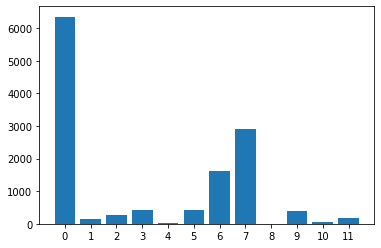

In [89]:
plt.bar(range(len(y_values_hist)), y_values_hist)
plt.xticks(range(len(y_values_hist)))

In [90]:
dict_activities

{'': 0,
 'Bed_to_Toilet': 1,
 'Eating': 2,
 'Enter_Home': 3,
 'Housekeeping': 4,
 'Leave_Home': 5,
 'Meal_Preparation': 6,
 'Relax': 7,
 'Respirate': 8,
 'Sleeping': 9,
 'Wash_Dishes': 10,
 'Work': 11}

In [92]:
X_padded_7000 = sequence.pad_sequences(X, maxlen=7000, dtype='int32')

In [93]:
X_padded_7000

array([[ 0,  0,  0, ..., 17, 25, 16],
       [ 0,  0,  0, ..., 17, 21, 16],
       [ 0,  0,  0, ..., 25, 21, 18],
       ...,
       [ 0,  0,  0, ..., 37, 36, 28],
       [ 0,  0,  0, ..., 21, 20, 24],
       [ 0,  0,  0, ..., 96, 97, 96]], dtype=int32)

In [94]:
len(X_padded_7000[0])

7000